Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

CSV from Repository

In [3]:
url = 'https://raw.githubusercontent.com/Sabotron/dataset_lab3/main/Womens%20Clothing%20E-Commerce%20Reviews.csv'
csv = pd.read_csv(url)


Check CSV data structure

In [ ]:
#display(csv)
#csv.dtypes
csv.info()
#csv.isnull()
#csv.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Create new dataset with Age, Rating, Recommended IND, Positive Feedback Count, Division Name, Department Name, Class Name

In [4]:
df = pd.DataFrame(csv)
df_new = df.iloc[:,[2,5,6,7,8,9,10]] 
#df_new.dtypes
#df_new.head(10) #Categorical Columns (Division Name, Department Name, Class Name)

Find unique values in Rating

In [5]:
df_new['Rating'].unique()

array([4, 5, 3, 2, 1])

Find unique values in Recommended IND

In [ ]:
df_new['Recommended IND'].unique()

array([1, 0])

Find unique values in Positive Feedback Count

In [ ]:
df_new['Positive Feedback Count'].unique()

array([  0,   4,   6,   1,  14,   2,   3,   7,   5,   9,  34,  10,  17,
        11,  24,  12,   8,  13,  20,  16,  23,  15,  19,  29,  32,  30,
        55,  84,  27,  43,  21,  42,  37,  71,  35,  65, 117,  33,  18,
        25,  47,  22,  51,  94,  31,  77,  61,  46,  26,  28,  36,  57,
        45,  66,  82,  44,  81,  58,  78,  38,  49,  52, 122,  41, 108,
        54,  40,  53,  87,  64,  89,  68,  56,  98,  95,  39,  93,  48,
        99,  50,  69,  59])

Search for Null values

In [6]:
df_new.isnull().sum()

Age                         0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              14
Department Name            14
Class Name                 14
dtype: int64

Rename column names to spanish

In [7]:
#list(df_new)
df_new.rename(columns = {'Age':'Edad', 
                        'Rating':'Clasificacion', 
                        'Recommended IND':'IND Recomendado', 
                        'Positive Feedback Count':'Conteo Retroalimentacion Positiva',
                        'Division Name':'Nombre Division',
                        'Department Name':'Nombre Departamento',
                        'Class Name':'Nombre Clase'
},inplace= True)

<ipython-input-7-7f68741bd785>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns = {'Age':'Edad',


In [8]:
display(df_new)

,Edad,Clasificacion,IND Recomendado,Conteo Retroalimentacion Positiva,Nombre Division,Nombre Departamento,Nombre Clase
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...
23481,34,5,1,0,General Petite,Dresses,Dresses
23482,48,3,1,0,General Petite,Tops,Knits
23483,31,3,0,1,General Petite,Dresses,Dresses
23484,28,3,1,2,General,Dresses,Dresses


Find unique values in categorical columns

In [ ]:
#df_new['Nombre Division'].unique()
#df_new['Nombre Departamento'].unique()
#df_new['Nombre Clase'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

Create dummies for categorical columns

In [9]:
df_old = df_new #store old dataframe in variable before changes 

df_new = pd.get_dummies(
    df_new,
    columns=['Nombre Division', 'Nombre Departamento', 'Nombre Clase'],
    drop_first=True
)

In [ ]:
display(df_new)

,Edad,Clasificacion,IND Recomendado,Conteo Retroalimentacion Positiva,Nombre Division_General Petite,Nombre Division_Initmates,Nombre Departamento_Dresses,Nombre Departamento_Intimate,Nombre Departamento_Jackets,Nombre Departamento_Tops,...,Nombre Clase_Legwear,Nombre Clase_Lounge,Nombre Clase_Outerwear,Nombre Clase_Pants,Nombre Clase_Shorts,Nombre Clase_Skirts,Nombre Clase_Sleep,Nombre Clase_Sweaters,Nombre Clase_Swim,Nombre Clase_Trend
0,33,4,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34,5,1,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50,5,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,47,5,1,6,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,34,5,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23482,48,3,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23483,31,3,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23484,28,3,1,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
display(df_old)

,Edad,Clasificacion,IND Recomendado,Conteo Retroalimentacion Positiva,Nombre Division,Nombre Departamento,Nombre Clase
0,33,4,1,0,Initmates,Intimate,Intimates
1,34,5,1,4,General,Dresses,Dresses
2,60,3,0,0,General,Dresses,Dresses
3,50,5,1,0,General Petite,Bottoms,Pants
4,47,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...
23481,34,5,1,0,General Petite,Dresses,Dresses
23482,48,3,1,0,General Petite,Tops,Knits
23483,31,3,0,1,General Petite,Dresses,Dresses
23484,28,3,1,2,General,Dresses,Dresses


Create Boxplot with all categorical columns

Nombre division => Edad

<Axes: xlabel='Nombre Division', ylabel='Edad'>

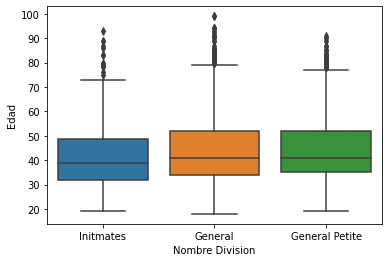

In [11]:
sns.boxplot(x = 'Nombre Division' , y ='Edad', data= df_old)


Nombre Departamento => Edad

<Axes: xlabel='Nombre Departamento', ylabel='Edad'>

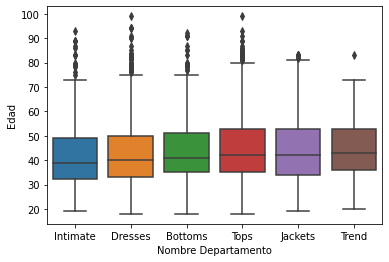

In [ ]:
sns.boxplot(x = 'Nombre Departamento' , y ='Edad', data= df_old)

Nombre Clase => Edad

<Axes: xlabel='Nombre Clase', ylabel='Edad'>

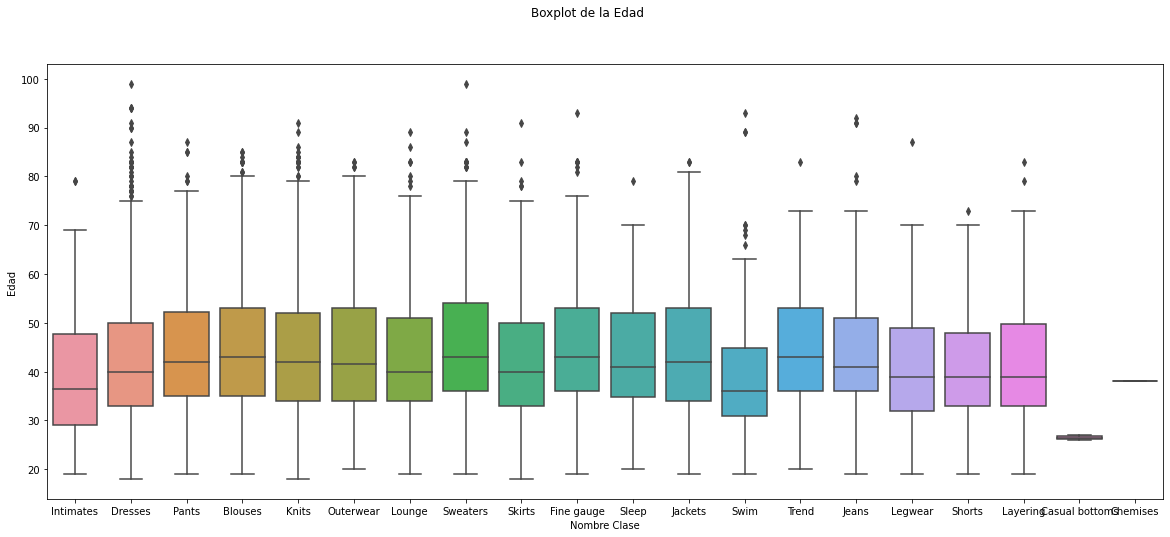

In [12]:
#sns.boxplot(x = 'Nombre Clase' , y ='Edad', data= df_old)
fig, axis = (plt.subplots(1,1,figsize=(20,8),sharey=True))
fig.suptitle('Boxplot de la Edad')
sns.boxplot(x = 'Nombre Clase' , y ='Edad', data= df_old)

Nombre Division => Clasificiacion

<Axes: xlabel='Nombre Division', ylabel='Clasificacion'>

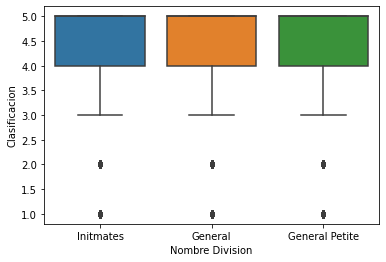

In [ ]:
sns.boxplot(x = 'Nombre Division' , y ='Clasificacion', data= df_old)

Nombre Departamento => Clasificacion

<Axes: xlabel='Nombre Departamento', ylabel='Clasificacion'>

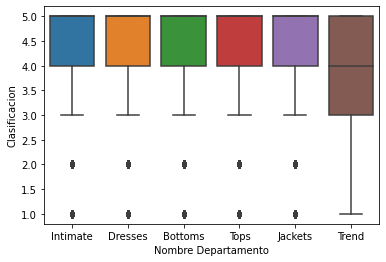

In [ ]:
sns.boxplot(x = 'Nombre Departamento' , y ='Clasificacion', data= df_old)

Nombre Clase => Clasificacion

<Axes: xlabel='Nombre Clase', ylabel='Clasificacion'>

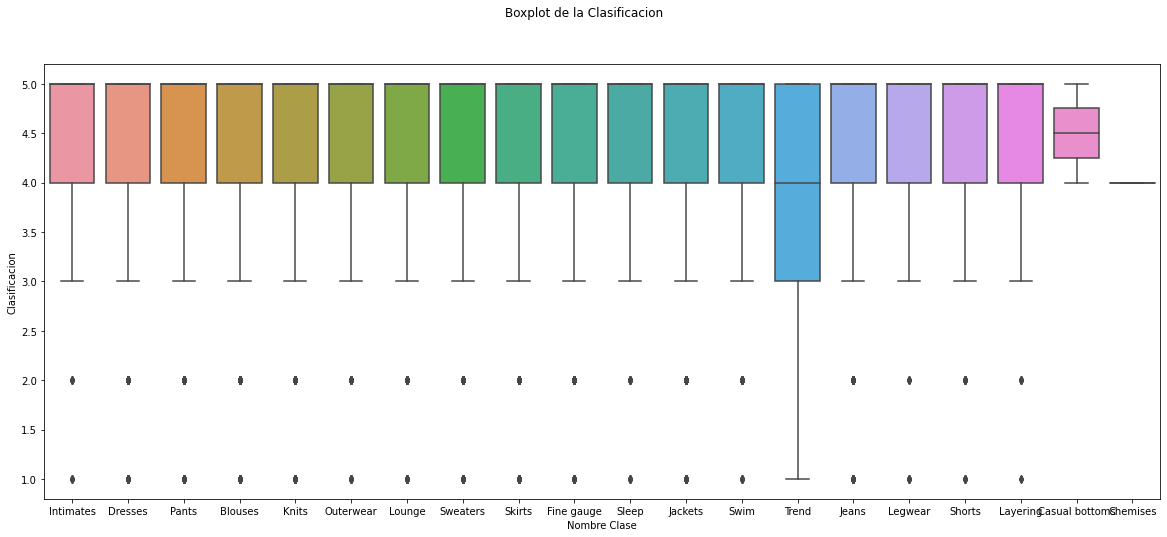

In [ ]:
#sns.boxplot(x = 'Nombre Clase' , y ='Clasificacion', data= df_old)
fig, axis = (plt.subplots(1,1,figsize=(20,8),sharey=True))
fig.suptitle('Boxplot de la Clasificacion')
sns.boxplot(x = 'Nombre Clase' , y ='Clasificacion', data= df_old)

Nombre Division => IND Recomendado

<Axes: xlabel='Nombre Division', ylabel='IND Recomendado'>

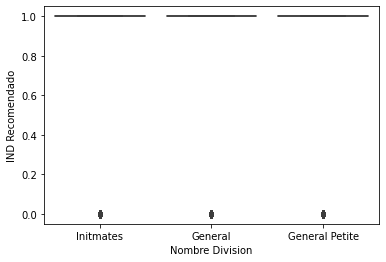

In [ ]:
sns.boxplot(x = 'Nombre Division' , y ='IND Recomendado', data= df_old)

Nombre Departamento => IND Recomendado

<Axes: xlabel='Nombre Departamento', ylabel='IND Recomendado'>

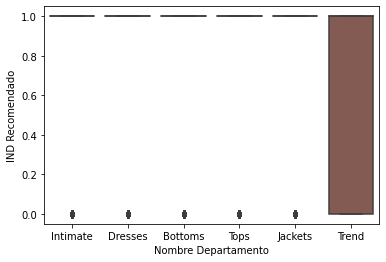

In [ ]:
sns.boxplot(x = 'Nombre Departamento' , y ='IND Recomendado', data= df_old)

Nombre Clase => IND Recomendado

<Axes: xlabel='Nombre Clase', ylabel='IND Recomendado'>

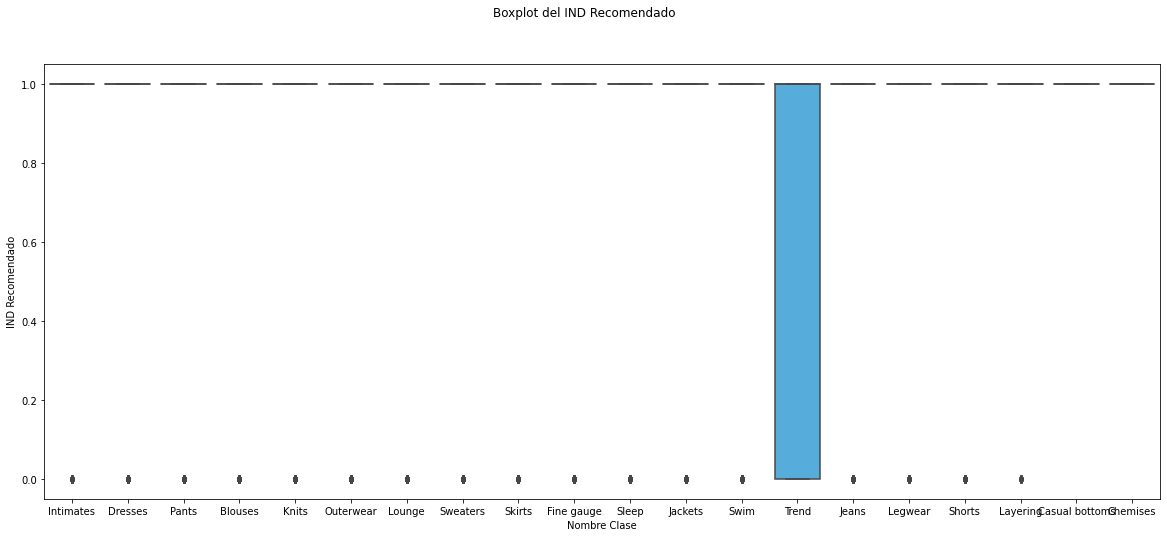

In [ ]:
#sns.boxplot(x = 'Nombre Clase' , y ='IND Recomendado', data= df_old)
fig, axis = (plt.subplots(1,1,figsize=(20,8),sharey=True))
fig.suptitle('Boxplot del IND Recomendado')
sns.boxplot(x = 'Nombre Clase' , y ='IND Recomendado', data= df_old)

Nombre Division => Conteo Retroalimentacion Positiva

<Axes: xlabel='Nombre Division', ylabel='Conteo Retroalimentacion Positiva'>

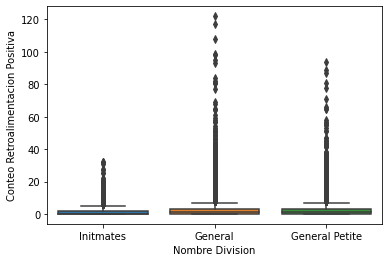

In [ ]:
sns.boxplot(x = 'Nombre Division' , y ='Conteo Retroalimentacion Positiva', data= df_old)

Nombre Departamento => Conteo Retroalimentacion Positiva

<Axes: xlabel='Nombre Departamento', ylabel='Conteo Retroalimentacion Positiva'>

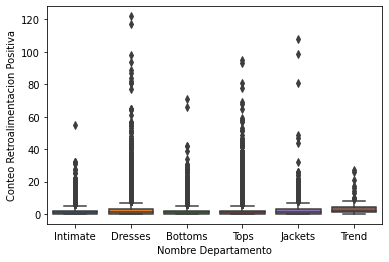

In [ ]:
sns.boxplot(x = 'Nombre Departamento' , y ='Conteo Retroalimentacion Positiva', data= df_old)

Nombre Clase => Conteo Retroalimentacion Positiva

<Axes: xlabel='Nombre Clase', ylabel='Conteo Retroalimentacion Positiva'>

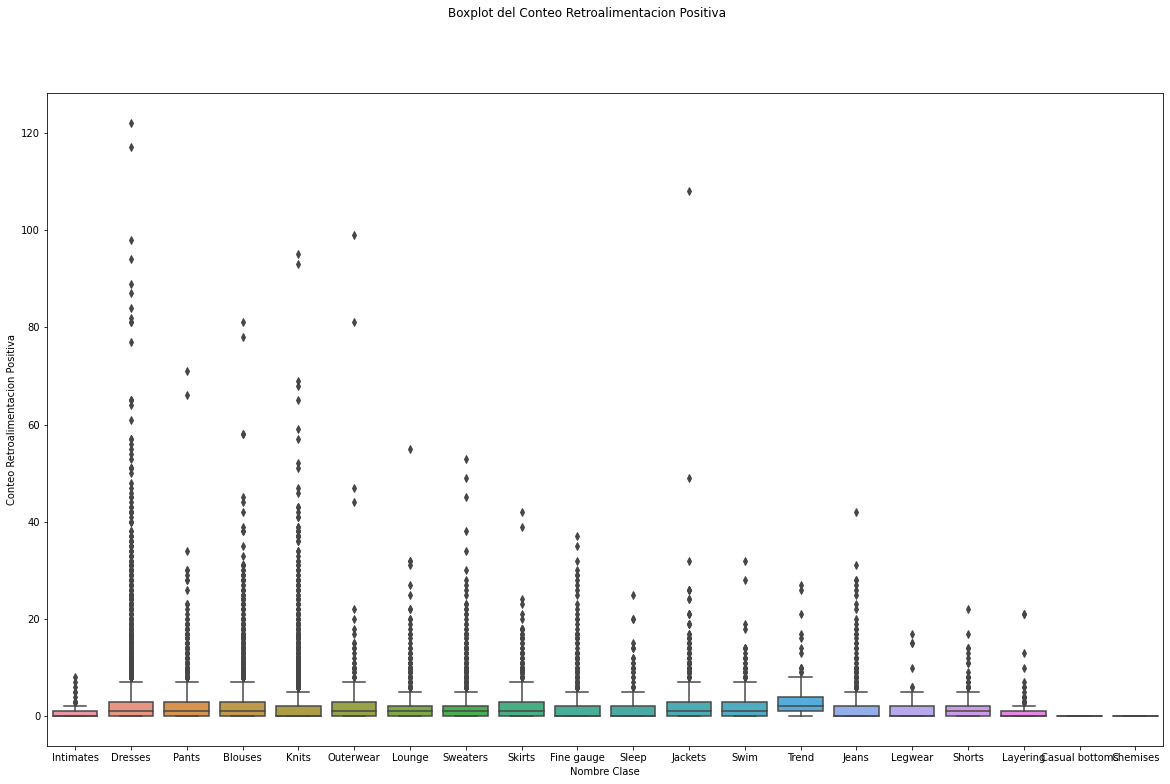

In [ ]:
#sns.boxplot(x = 'Nombre Clase' , y ='Conteo Retroalimentacion Positiva', data= df_old)
fig, axis = (plt.subplots(1,1,figsize=(20,12),sharey=True))
fig.suptitle('Boxplot del Conteo Retroalimentacion Positiva')
sns.boxplot(x = 'Nombre Clase' , y ='Conteo Retroalimentacion Positiva', data= df_old)

Create Histogram

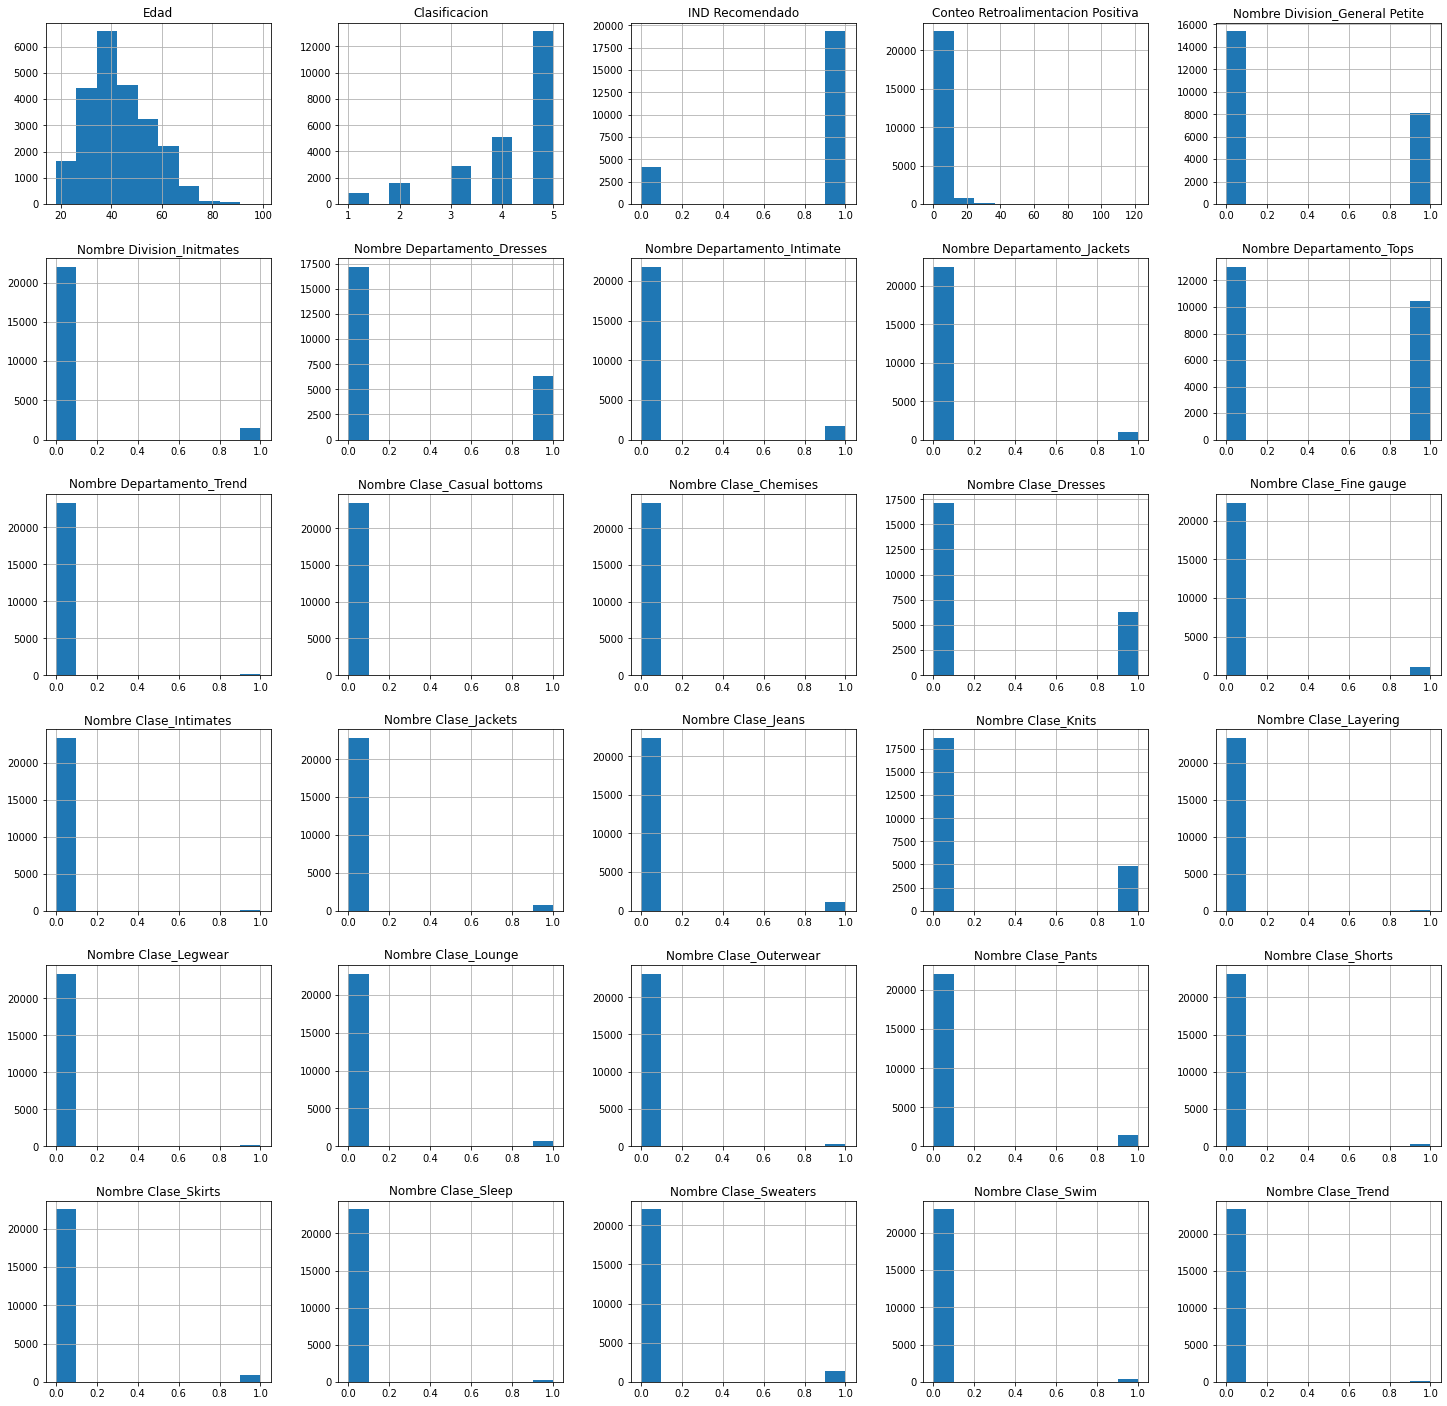

In [ ]:
plt.rcParams["figure.figsize"] = (25,25)
df_new.hist()
plt.show()

Group by Nombre Division

In [15]:
fig = plt.figure(figsize=(25,10))
grp_division = df_old.groupby('Nombre Division')['Nombre Division'].count()
df_division = pd.DataFrame(grp_division)
df_division

,Nombre Division
Nombre Division,
General,13850
General Petite,8120
Initmates,1502


<Figure size 1800x720 with 0 Axes>

Rename Columns and create DataFrame for Nombre Division




In [17]:
df_division = df_division.rename(columns={'Nombre Division' : 'Total'})
dfi_division = df_division.reset_index()
dfi_division.reset_index(drop=True, inplace= True)

In [18]:
dfi_division

,Nombre Division,Total
0,General,13850
1,General Petite,8120
2,Initmates,1502


Group By Nombre Departamento

In [19]:
fig = plt.figure(figsize=(25,10))
grp_departamento = df_old.groupby('Nombre Departamento')['Nombre Departamento'].count()
df_departamento = pd.DataFrame(grp_departamento)
df_departamento

,Nombre Departamento
Nombre Departamento,
Bottoms,3799
Dresses,6319
Intimate,1735
Jackets,1032
Tops,10468
Trend,119


<Figure size 1800x720 with 0 Axes>

Rename Columns and create DataFrame for Nombre Departamento

In [20]:
df_departamento = df_departamento.rename(columns={'Nombre Departamento' : 'Total'})
dfi_departamento = df_departamento.reset_index()
dfi_departamento.reset_index(drop=True, inplace= True)

In [21]:
dfi_departamento

,Nombre Departamento,Total
0,Bottoms,3799
1,Dresses,6319
2,Intimate,1735
3,Jackets,1032
4,Tops,10468
5,Trend,119


Group By Nombre Clase



In [22]:
fig = plt.figure(figsize=(25,10))
grp_clase = df_old.groupby('Nombre Clase')['Nombre Clase'].count()
df_clase = pd.DataFrame(grp_clase)
df_clase

,Nombre Clase
Nombre Clase,
Blouses,3097
Casual bottoms,2
Chemises,1
Dresses,6319
Fine gauge,1100
Intimates,154
Jackets,704
Jeans,1147
Knits,4843


<Figure size 1800x720 with 0 Axes>

Rename Columns and create DataFrame for Nombre Clase

In [23]:
df_clase = df_clase.rename(columns={'Nombre Clase' : 'Total'})
dfi_clase = df_clase.reset_index()
dfi_clase.reset_index(drop=True, inplace= True)

In [24]:
dfi_clase

,Nombre Clase,Total
0,Blouses,3097
1,Casual bottoms,2
2,Chemises,1
3,Dresses,6319
4,Fine gauge,1100
5,Intimates,154
6,Jackets,704
7,Jeans,1147
8,Knits,4843
9,Layering,146


Create Barplot & Pie of Nombre Division

<Axes: xlabel='Nombre Division', ylabel='Total'>

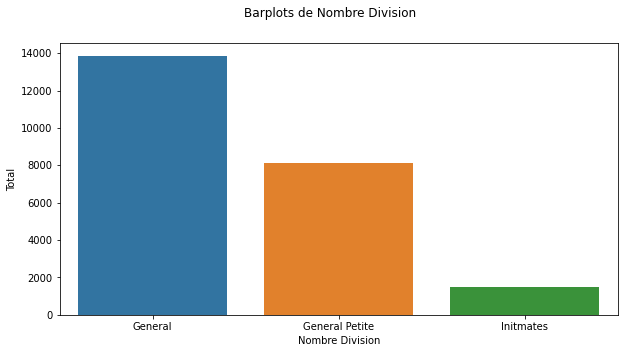

In [38]:
fig, axis = plt.subplots(1,1,figsize=(10,5),sharey=True)
fig.suptitle('Barplots de Nombre Division')
sns.barplot(x='Nombre Division', y='Total', data=dfi_division)

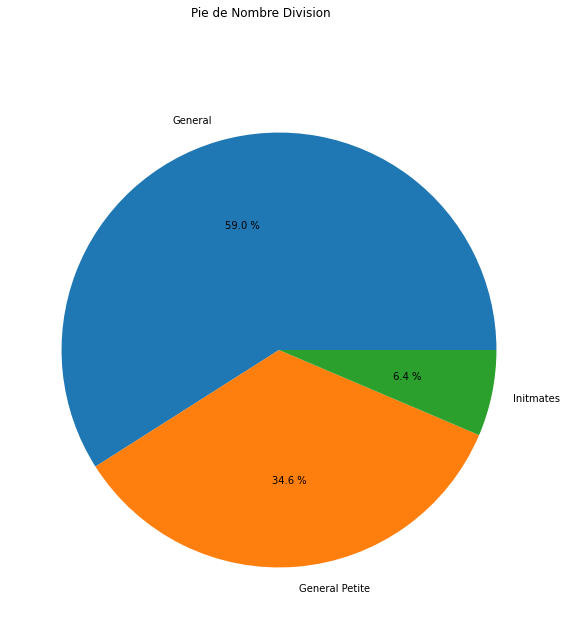

In [48]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Pie de Nombre Division')
plt.pie(dfi_division['Total'],labels=dfi_division['Nombre Division'],autopct="%0.1f %%")
plt.show()

Create Barplot & Pie of Nombre Departamento

<Axes: xlabel='Nombre Departamento', ylabel='Total'>

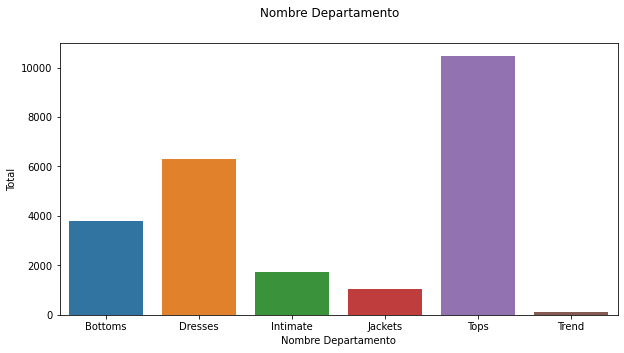

In [39]:
fig, axis = plt.subplots(1,1,figsize=(10,5),sharey=True)
fig.suptitle('Nombre Departamento')
sns.barplot(x='Nombre Departamento', y='Total', data=dfi_departamento)

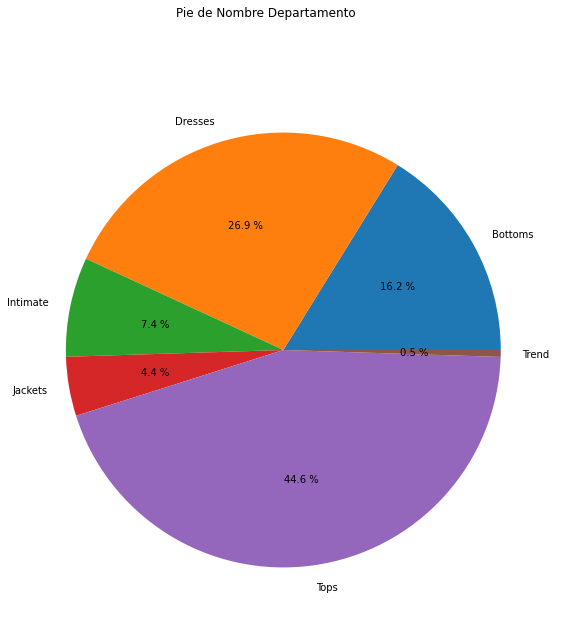

In [49]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Pie de Nombre Departamento')
plt.pie(dfi_departamento['Total'],labels=dfi_departamento['Nombre Departamento'],autopct="%0.1f %%")
plt.show()

Create Barplot & Pie of Nombre Clase

<Axes: xlabel='Nombre Clase', ylabel='Total'>

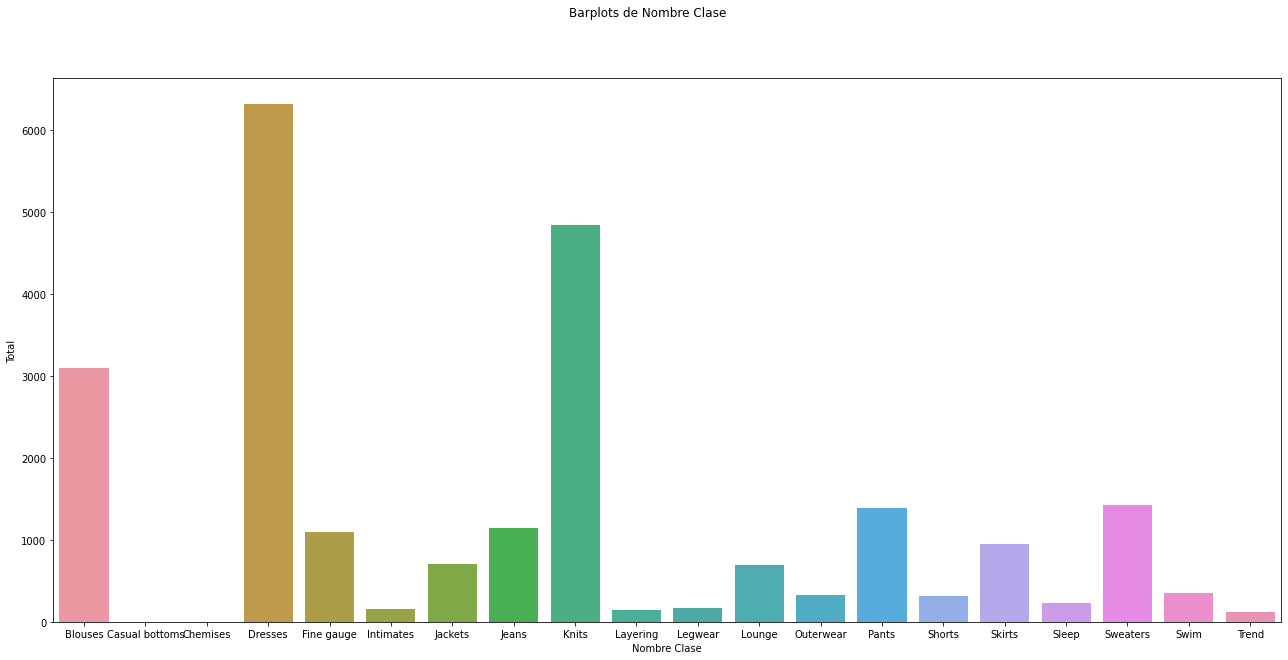

In [43]:
fig, axis = plt.subplots(1,1,figsize=(22,10),sharey=True)
fig.suptitle('Barplots de Nombre Clase')
sns.barplot(x='Nombre Clase', y='Total', data=dfi_clase)

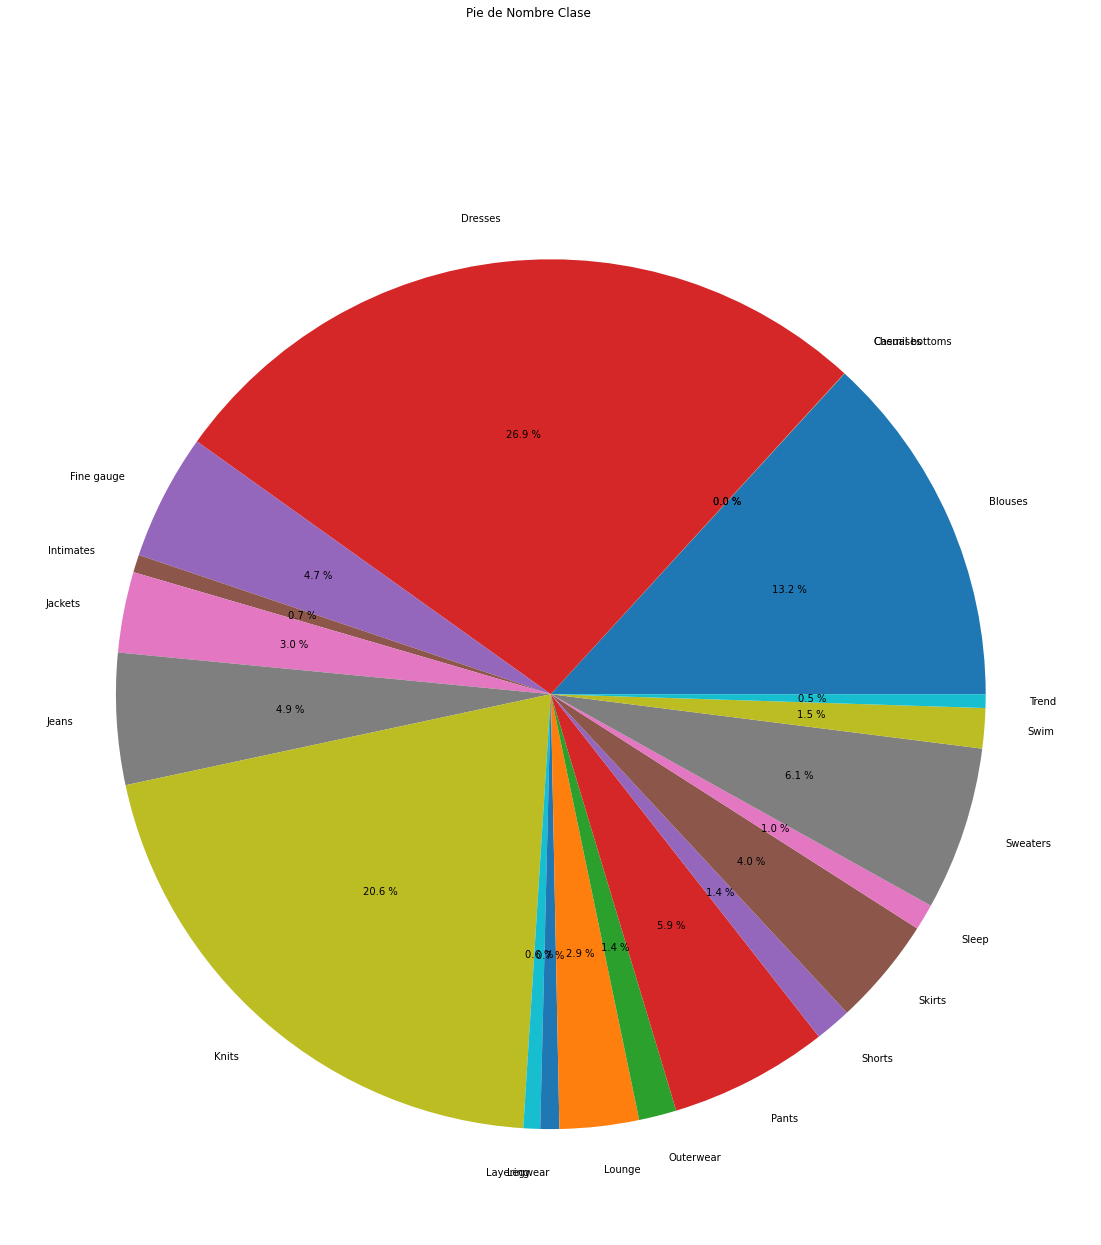

In [53]:
fig = plt.figure(figsize=(25,20))
fig.suptitle('Pie de Nombre Clase')
plt.pie(dfi_clase['Total'],labels=dfi_clase['Nombre Clase'],autopct="%0.1f %%")
plt.show()

Average Age

In [58]:
#print(df_old.groupby(by='Edad').mean().round())
print(df_new.groupby(by='Edad').mean().round())

      Clasificacion  IND Recomendado  Conteo Retroalimentacion Positiva  \
Edad                                                                      
18              4.0              1.0                                0.0   
19              4.0              1.0                                2.0   
20              4.0              1.0                                1.0   
21              4.0              1.0                                2.0   
22              4.0              1.0                                2.0   
...             ...              ...                                ...   
91              3.0              0.0                                4.0   
92              5.0              1.0                                2.0   
93              4.0              1.0                                2.0   
94              3.0              1.0                                0.0   
99              4.0              1.0                                2.0   

      Nombre Division_Ge